# Streamlining code 

We will: 
extract data from CSV to create a geopandasDataFrame 
do more customizations w matplotlib 
go over strategies to streamline code 


In [1]:
import os

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

# Display all columns when looking at dataframes 
pd.set_option("display.max.columns", None)

In [2]:
# Import power plants data

URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Drop first column 

power_plants = power_plants.drop(columns = 'Unnamed: 0')

power_plants.head()

objectid plant_code          plant_name utility_id  \
0    11570          1          Sand Point      63560   
1    11571          2        Bankhead Dam        195   
2    11572          3               Barry        195   
3    11573          4  Walter Bouldin Dam        195   
4    11574          9              Copper       5701   

                     utility_name       sector_name        street_address  \
0  TDX Sand Point Generating, LLC  Electric Utility   100 Power Plant Way   
1                Alabama Power Co  Electric Utility    19001 Lock 17 Road   
2                Alabama Power Co  Electric Utility      North Highway 43   
3                Alabama Power Co  Electric Utility  750 Bouldin Dam Road   
4             El Paso Electric Co  Electric Utility     651 Hawkins Blvd.   

         city          county    state      zip     primsource  \
0  Sand Point  Aleutians East   Alaska  99661.0      petroleum   
1   Northport      Tuscaloosa  Alabama  35476.0  hydroelectric   
2       Bucks          Mobile  Alabama  36512.0    natural gas   
3    Wetumpka          Elmore  Alabama  36092.0  hydroelectric   
4     El Paso         El Paso    Texas  79915.0    natural gas   

                                 source_desc  \
0          Petroleum = 1.3 MW, Wind = 0.4 MW   
1                      Hydroelectric = 53 MW   
2  Coal = 1118.5 MW, Natural Gas = 1296.2 MW   
3                   Hydroelectric = 224.1 MW   
4                        Natural Gas = 63 MW   

                                           tech_desc  install_mw  total_mw  \
0           Petroleum Liquids; Onshore Wind Turbine;         3.7       1.7   
1                         Conventional Hydroelectric        53.9      53.0   
2  Conventional Steam Coal; Natural Gas Fired Com...      2569.5    2414.7   
3                         Conventional Hydroelectric       225.0     224.1   
4               Natural Gas Fired Combustion Turbine        86.9      63.0   

   bat_mw  bio_mw  coal_mw  geo_mw  hydro_mw  hydrops_mw   ng_mw nuclear_mw  \
0     NaN     NaN      NaN     NaN       NaN         NaN     NaN        NaN   
1     NaN     NaN      NaN     NaN      53.0         NaN     NaN        NaN   
2     NaN     NaN   1118.5     NaN       NaN         NaN  1296.2        NaN   
3     NaN     NaN      NaN     NaN     224.1         NaN     NaN        NaN   
4     NaN     NaN      NaN     NaN       NaN         NaN    63.0        NaN   

   crude_mw  solar_mw  wind_mw  other_mw                         source  \
0       1.3       NaN      0.4       NaN  EIA-860, EIA-860M and EIA-923   
1       NaN       NaN      NaN       NaN  EIA-860, EIA-860M and EIA-923   
2       NaN       NaN      NaN       NaN  EIA-860, EIA-860M and EIA-923   
3       NaN       NaN      NaN       NaN  EIA-860, EIA-860M and EIA-923   
4       NaN       NaN      NaN       NaN  EIA-860, EIA-860M and EIA-923   

     period   longitude   latitude  
0  202305.0 -160.497222  55.339722  
1  202305.0  -87.356823  33.458665  
2  202305.0  -88.010300  31.006900  
3  202305.0  -86.283056  32.583889  
4  202305.0 -106.375000  31.756900

In [3]:
# Import states data

fp = os.path.join('data','week5','tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names 
states.columns = states.columns.str.lower() 

states.head(3)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


region division statefp   statens geoid stusps           name lsad  mtfcc  \
0      3        5      54  01779805    54     WV  West Virginia   00  G4000   
1      3        5      12  00294478    12     FL        Florida   00  G4000   
2      2        3      17  01779784    17     IL       Illinois   00  G4000   

  funcstat         aland       awater     intptlat      intptlon  \
0        A   62266456923    489045863  +38.6472854  -080.6183274   
1        A  138962819934  45971472526  +28.3989775  -082.5143005   
2        A  143778515726   6216539665  +40.1028754  -089.1526108   

                                            geometry  
0  POLYGON ((-77.75438 39.33346, -77.75422 39.333...  
1  MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...  
2  POLYGON ((-87.89243 38.28285, -87.89334 38.282...

## CSV to `geopandas.GeoDataFrame`

The power plants file is a CSV. Unlike shapefiles, `geopandas` doesnt have a way to extract a geometry column from CSV, so need to specify this manually. 

We will use the longitude and latitude columsn in the csv, these indicate the location of the power plants in the NAD83 CRS (ESPG: 4259)

In [4]:
# Create points from latitude and longitue 

points = gpd.points_from_xy(power_plants.longitude, 
                   power_plants.latitude)

# Create a geodataframe 

In [5]:
power_plants = gpd.GeoDataFrame(power_plants,  #Data
                 geometry = points, # Specify geometry column 
                 crs = 'EPSG:4269' # Specify CRS 
                )

<Axes: >

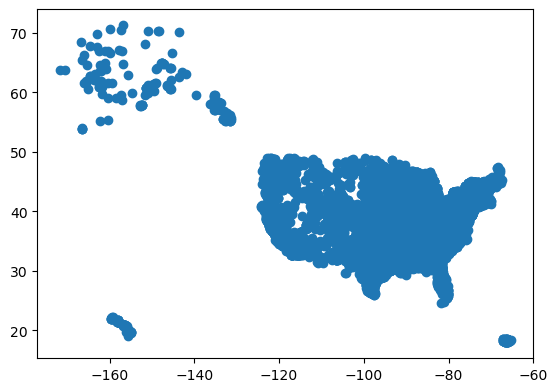

In [6]:
power_plants.plot()

## f-strings

We have printed variables using string concatenation inside print function writting commas between every string and variable we want to print: 


In [7]:
print('CRS:', power_plants.crs)

CRS: EPSG:4269


f-strings = formatted string. The simplest syntax for an fstring is : 

```default 
f" some text {replace}
```

In [8]:
# Explore CRS 

print(f"ellipsoid: {power_plants.crs.ellipsoid}")

print(f"datum: {power_plants.crs.datum}")

ellipsoid: GRS 1980
datum: North American Datum 1983


In [9]:
print(f"{'Is the CRS Geographic?' : <25} {power_plants.crs.is_geographic}") 
print(f"{'Is the CRS Projected?' : <25} {power_plants.crs.is_projected}") 

Is the CRS Geographic?    True
Is the CRS Projected?     False


 ## Explore TIGER shapefile
 
 Preliminary informationn about the states geodataframe 

In [10]:
states.tail()

region division statefp   statens geoid stusps                  name lsad  \
51      1        1      25  00606926    25     MA         Massachusetts   00   
52      3        5      51  01779803    51     VA              Virginia   00   
53      3        5      11  01702382    11     DC  District of Columbia   00   
54      2        4      19  01779785    19     IA                  Iowa   00   
55      4        8      04  01779777    04     AZ               Arizona   00   

    mtfcc funcstat         aland      awater     intptlat      intptlon  \
51  G4000        A   20204341720  7130708927  +42.1565196  -071.4895915   
52  G4000        A  102258178227  8528072639  +37.5222512  -078.6681938   
53  G4000        A     158316184    18709787  +38.9042474  -077.0165167   
54  G4000        A  144659596400  1086089872  +42.0700243  -093.4933473   
55  G4000        A  294365853885   853990728  +34.2039362  -111.6063449   

                                             geometry  
51  POLYGON ((-71.25515 42.73655, -71.25510 42.736...  
52  POLYGON ((-76.49150 36.55065, -76.49388 36.550...  
53  POLYGON ((-77.11975 38.93435, -77.11886 38.935...  
54  POLYGON ((-95.86095 43.50004, -95.85979 43.500...  
55  POLYGON ((-110.75069 37.00301, -110.74193 37.0...

EPSG:4269


<Axes: >

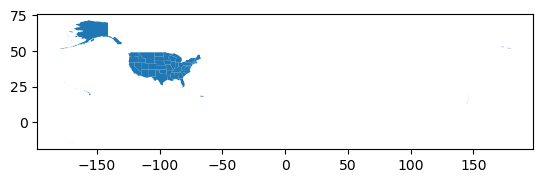

In [11]:
print(states.crs) 
states.plot()

## `for` loops 

It can be easier to work with codes as numbers instead of strings, let's update the corresponding columns in the states geo-dataframe 

In [12]:
# Examine in the region, divison, statefp columns are string or numeric 

print(f"Region is string dtype? {is_string_dtype(states['region'])}")

Region is string dtype? True


This is inconveninet because it repeats the same piece of code, only changing the column name. 

Can use forloop to streamline. 

In [13]:
code_cols = ['region', 'division', 'statefp']

# Check whether code columns are strings 

for column in code_cols: 
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


DRY code dint repeat yourself Don’t Repeat Yourself (DRY) is a core programming principle that encourages reducing redundancy and consolidating repeated logic. Try implementing it as much as possible! If you need to repeat the “same” code more than twice, you likely need a for loop.

## Assert 

Next, we update the data type of the code columns to be integers. This time, we check the data type of the column using the is_numeric_dtype() function inside an assert statement:

In [14]:
# Does nothing if statement is true 

assert 2 + 2 ==4

# Raise an error if statement is false 

assert 2+2 == 3

AssertionError: 

A workflow for updating the data type of code columns to be integers: 

for each column in code_columns: 
    comert column to numeric 
    check if column is numeric using assert 

In [ ]:
# Update code columns into integers 

for column in code_cols: 
    states[column] = states[column].astype('int') 
    assert is_numeric_dtype(states[column])

In [ ]:
states.dtypes

## Data Selection 

For this lesson, we want to use data for the contigous states. The data covers a larger extension: 

<Axes: >

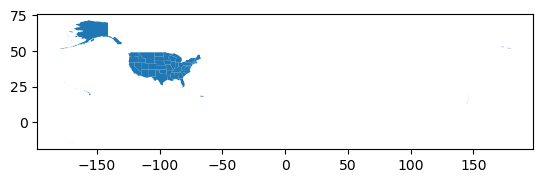

In [16]:
states.plot()

## Check in 

What are the unique values for region, division, or state codes in the data?

Which codes should should we select to keep only states in the contiguous US?


In [24]:
states.head()

region division statefp   statens geoid stusps           name lsad  mtfcc  \
0      3        5      54  01779805    54     WV  West Virginia   00  G4000   
1      3        5      12  00294478    12     FL        Florida   00  G4000   
2      2        3      17  01779784    17     IL       Illinois   00  G4000   
3      2        4      27  00662849    27     MN      Minnesota   00  G4000   
4      3        5      24  01714934    24     MD       Maryland   00  G4000   

  funcstat         aland       awater     intptlat      intptlon  \
0        A   62266456923    489045863  +38.6472854  -080.6183274   
1        A  138962819934  45971472526  +28.3989775  -082.5143005   
2        A  143778515726   6216539665  +40.1028754  -089.1526108   
3        A  206244837557  18937184315  +46.3159573  -094.1996043   
4        A   25151771744   6979295311  +38.9466584  -076.6744939   

                                            geometry  
0  POLYGON ((-77.75438 39.33346, -77.75422 39.333...  
1  MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...  
2  POLYGON ((-87.89243 38.28285, -87.89334 38.282...  
3  POLYGON ((-95.31989 48.99892, -95.31747 48.998...  
4  POLYGON ((-75.75600 39.24607, -75.75579 39.243...

In [28]:
print(states.region.unique())
print(states.division.unique())
print(states.statefp.unique())

['3' '2' '1' '4' '9']
['5' '3' '4' '1' '8' '9' '2' '7' '6' '0']
['54' '12' '17' '27' '24' '44' '16' '33' '37' '50' '09' '10' '35' '06'
 '34' '55' '41' '31' '42' '53' '22' '13' '01' '49' '39' '48' '08' '45'
 '40' '47' '56' '15' '38' '21' '78' '69' '66' '23' '36' '32' '02' '60'
 '26' '05' '28' '29' '30' '20' '18' '72' '46' '25' '51' '11' '19' '04']


Remove region 9 or  0
Hawaii have codes 2 and 15 

<Axes: >

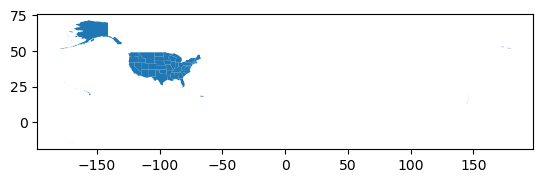

In [55]:
# Select contiguous US States 

contiguous = states[(states.region!=9) & (~states.statefp.isin([2,15]))]
contiguous.plot()

Tilde is used in python to negate a statement 



Select the data in the powerplants data for the contiguous states 

In [40]:
power_plants.head(2)

objectid plant_code    plant_name utility_id  \
0    11570          1    Sand Point      63560   
1    11571          2  Bankhead Dam        195   

                     utility_name       sector_name       street_address  \
0  TDX Sand Point Generating, LLC  Electric Utility  100 Power Plant Way   
1                Alabama Power Co  Electric Utility   19001 Lock 17 Road   

         city          county    state      zip     primsource  \
0  Sand Point  Aleutians East   Alaska  99661.0      petroleum   
1   Northport      Tuscaloosa  Alabama  35476.0  hydroelectric   

                         source_desc  \
0  Petroleum = 1.3 MW, Wind = 0.4 MW   
1              Hydroelectric = 53 MW   

                                  tech_desc  install_mw  total_mw  bat_mw  \
0  Petroleum Liquids; Onshore Wind Turbine;         3.7       1.7     NaN   
1                Conventional Hydroelectric        53.9      53.0     NaN   

   bio_mw  coal_mw  geo_mw  hydro_mw  hydrops_mw  ng_mw nuclear_mw  crude_mw  \
0     NaN      NaN     NaN       NaN         NaN    NaN        NaN       1.3   
1     NaN      NaN     NaN      53.0         NaN    NaN        NaN       NaN   

   solar_mw  wind_mw  other_mw                         source    period  \
0       NaN      0.4       NaN  EIA-860, EIA-860M and EIA-923  202305.0   
1       NaN      NaN       NaN  EIA-860, EIA-860M and EIA-923  202305.0   

    longitude   latitude                     geometry  
0 -160.497222  55.339722  POINT (-160.49722 55.33972)  
1  -87.356823  33.458665   POINT (-87.35682 33.45867)

<Axes: >

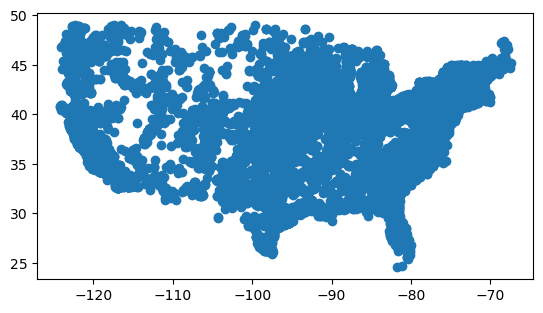

In [49]:
power_plants = power_plants[~power_plants.state.isin(['Hawaii', 'Alaska', 'Puerto Rico'])]
power_plants.plot()

## Plotting 

Before plotting data we need to make sure they are in the same CRS


In [44]:
contiguous.crs == power_plants.crs

True

<function matplotlib.pyplot.show(close=None, block=None)>

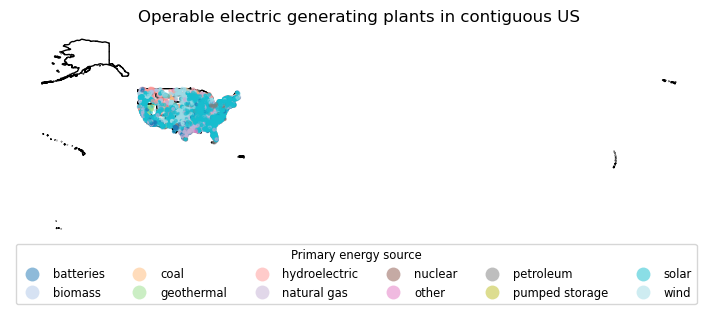

In [50]:
fig, ax = plt.subplots(figsize = (9,7)) # Update figure size 

# Remove axis for cleaner map 

ax.axis('off') 

# Title 

ax.set_title('Operable electric generating plants in contiguous US') 

# Add states 
contiguous.plot(ax = ax, 
                color = 'none') 

# Add power plants colored by energy source 

power_plants.plot(ax = ax, 
                  column = 'primsource', 
                  legend = True, 
                  markersize = 4, 
                  cmap = 'tab20', 
                  alpha = 0.5, 
                   legend_kwds = {
                       'title': 'Primary energy source',
                      'title_fontsize': 'small',
                      'fontsize': 'small',
                      'loc': 'upper left',
                      'bbox_to_anchor': (0, 0),
                      'ncol': 6
                 
                   }) # Color palette for points 

plt.show

## `for` with `zip` 

Often we need to iterate simultaneously over two lists (or iterables). 

zip is a python function that allows you to combine two lists so you can iterate over their elements in pairs. When used 

In [52]:
# Iterate over a single list 
numbers = [1, 2, 3] 
for num in numbers: 
    print(num + 1) 

2
3
4


In [53]:
# Iterate over two lists in pairs using zips 

letters = ['a', 'b', 'c'] 
for num, letter in zip(numbers, letters): 
    print(num+1, letter) 

2 a
3 b
4 c


<function matplotlib.pyplot.show(close=None, block=None)>

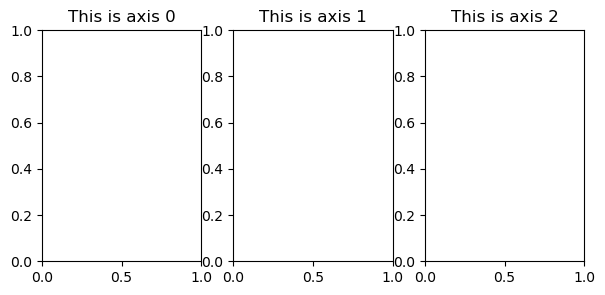

In [59]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (7,3)) 

axes[0].set_title('This is axis 0') 
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

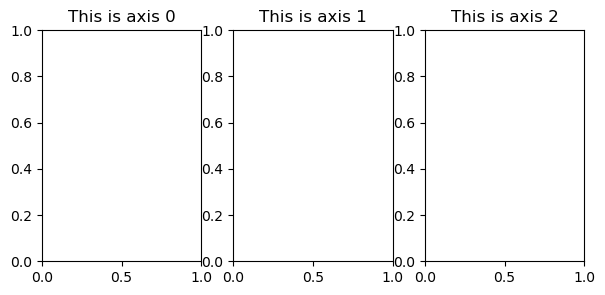

In [61]:
# Use zip to create the same subplots and avoid redundancy 

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (7,3)) 


for ax, i in zip(axes, [0,1,2]): 
    ax.set_title(f'This is axis {i}') 
    
plt.show

In [62]:
power_plants.head(1)

objectid plant_code    plant_name utility_id      utility_name  \
1    11571          2  Bankhead Dam        195  Alabama Power Co   

        sector_name      street_address       city      county    state  \
1  Electric Utility  19001 Lock 17 Road  Northport  Tuscaloosa  Alabama   

       zip     primsource            source_desc                   tech_desc  \
1  35476.0  hydroelectric  Hydroelectric = 53 MW  Conventional Hydroelectric   

   install_mw  total_mw  bat_mw  bio_mw  coal_mw  geo_mw  hydro_mw  \
1        53.9      53.0     NaN     NaN      NaN     NaN      53.0   

   hydrops_mw  ng_mw nuclear_mw  crude_mw  solar_mw  wind_mw  other_mw  \
1         NaN    NaN        NaN       NaN       NaN      NaN       NaN   

                          source    period  longitude   latitude  \
1  EIA-860, EIA-860M and EIA-923  202305.0 -87.356823  33.458665   

                     geometry  
1  POINT (-87.35682 33.45867)

In [105]:
ca_power_plants = power_plants[power_plants['state'] == 'California']

In [98]:
top_sources = ['solar', 'natural gas', 'hydroelectric'] 

In [86]:
#top_sources = ca_powerplants[ca_powerplants['primsource'].isin(['solar', 'natural gas', 'hydroelectric'])]

In [69]:
ca_boundary = states[states['statefp'] == '06']

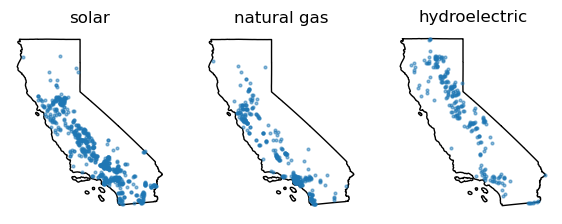

In [109]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (7,3)) 

for ax, i in zip(ax, top_sources): 
    ax.set_title(i)
    ax.axis('off') 
    
    ca_boundary.plot(ax = ax, 
                    color = 'none', 
                    edgecolor = 'black') 
    
    ca_power_plants[ca_power_plants['primsource'] == i].plot(ax = ax, 
                                                            markersize = 4, 
                                                            alpha = .5)